<a href="https://colab.research.google.com/github/canreves/dsaTermProjectFall25/blob/main/project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Setup Complete. Features: ['popularity', 'runtime', 'vote_average', 'vote_count', 'Year', 'Star_Prestige_Index', 'CPI', 'Real_Budget', 'UNRATE', 'Is_Holiday']
--------------------------------------------------

>>> MODEL TRAINING & EVALUATION STARTED <<<

Finished: Linear Regression (R2: 0.7500)
Finished: Ridge Regression (R2: 0.7503)
Finished: Random Forest (R2: 0.6922)


### 1. OVERALL MODEL COMPARISON ###


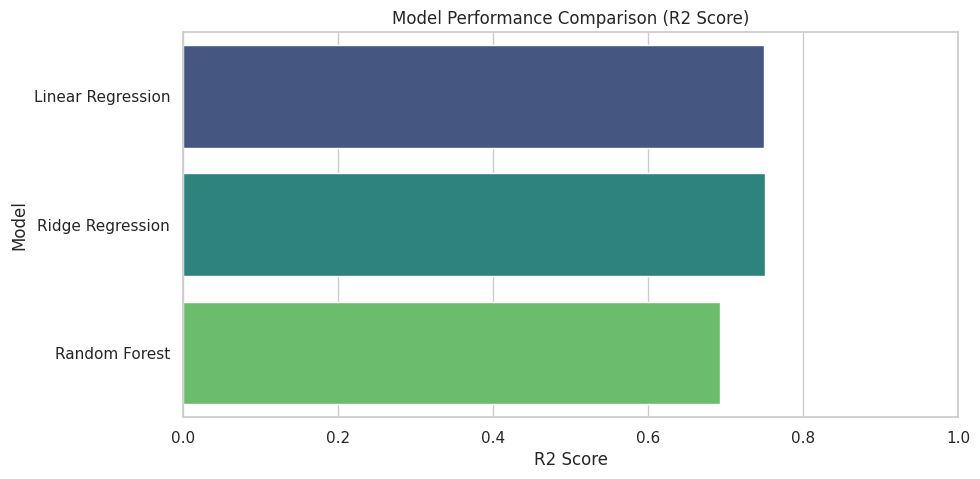




### DETAILED ANALYSIS: LINEAR REGRESSION ###


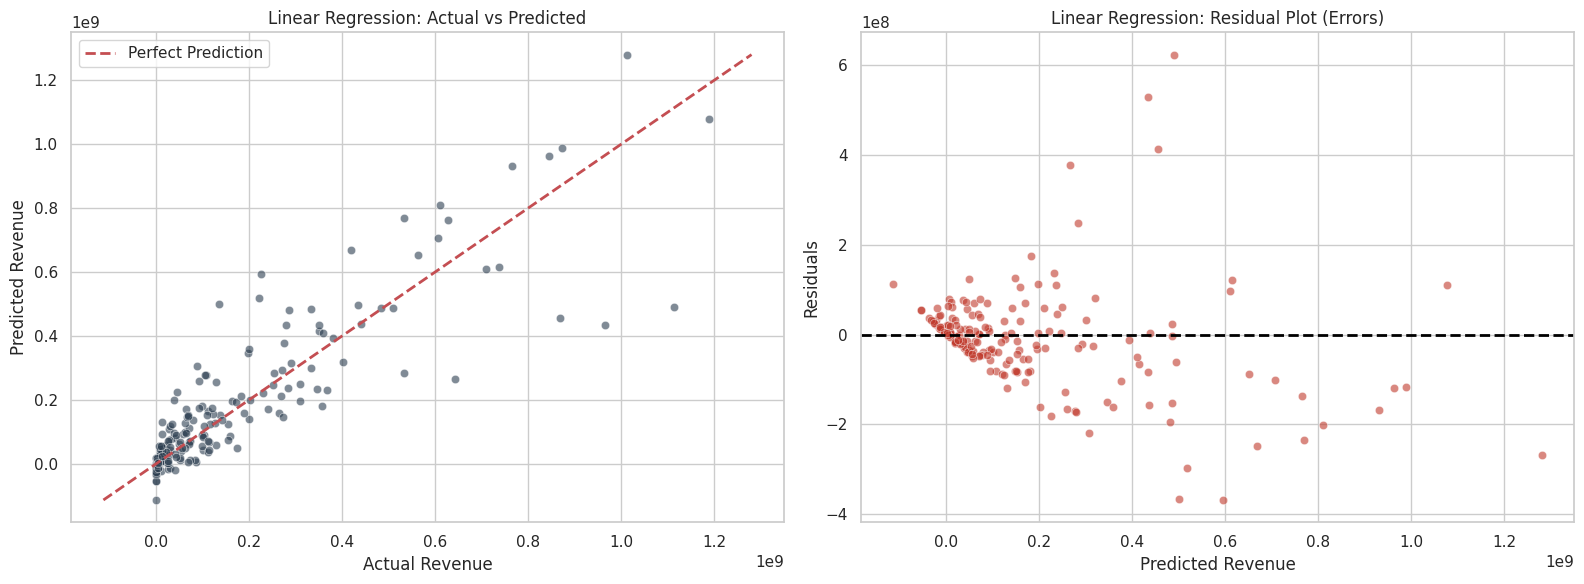

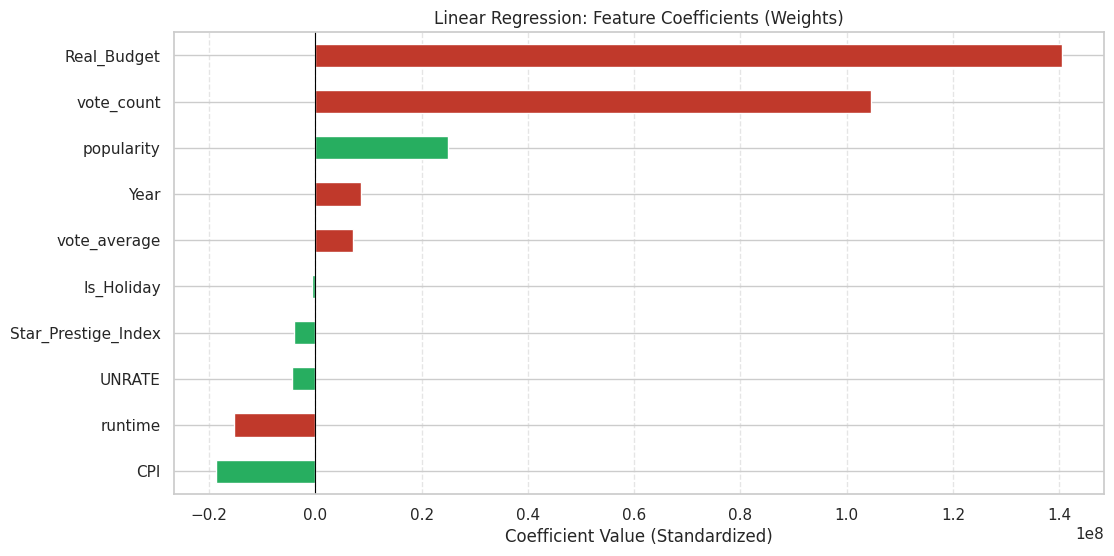



--------------------------------------------------


### DETAILED ANALYSIS: RIDGE REGRESSION ###


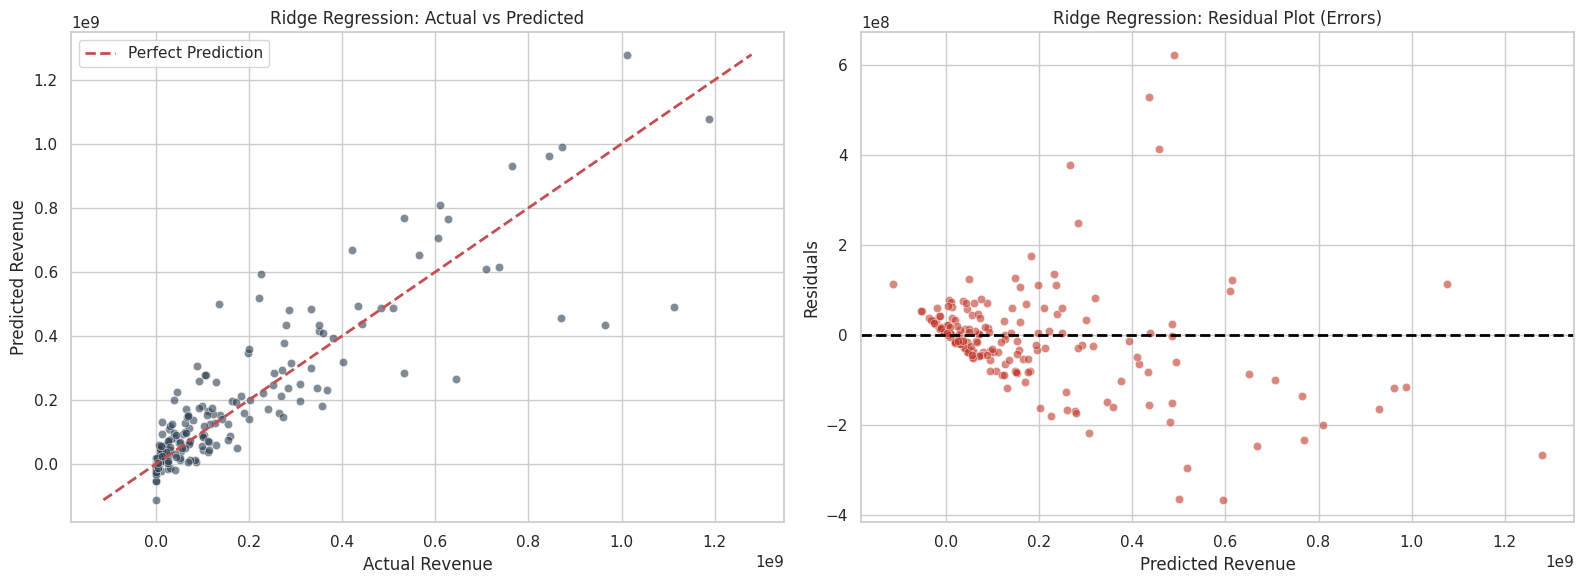

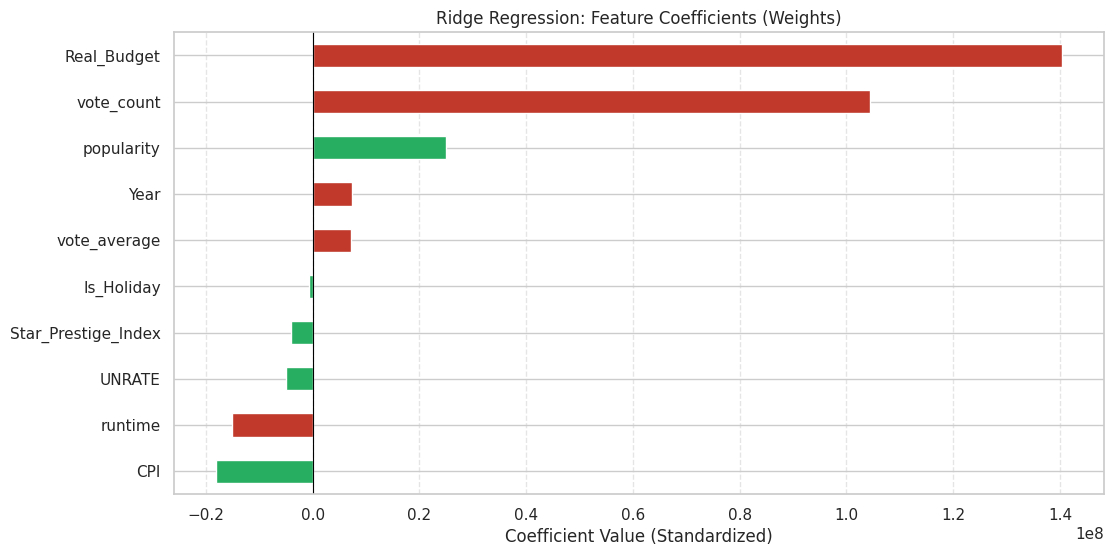



--------------------------------------------------


### DETAILED ANALYSIS: RANDOM FOREST ###


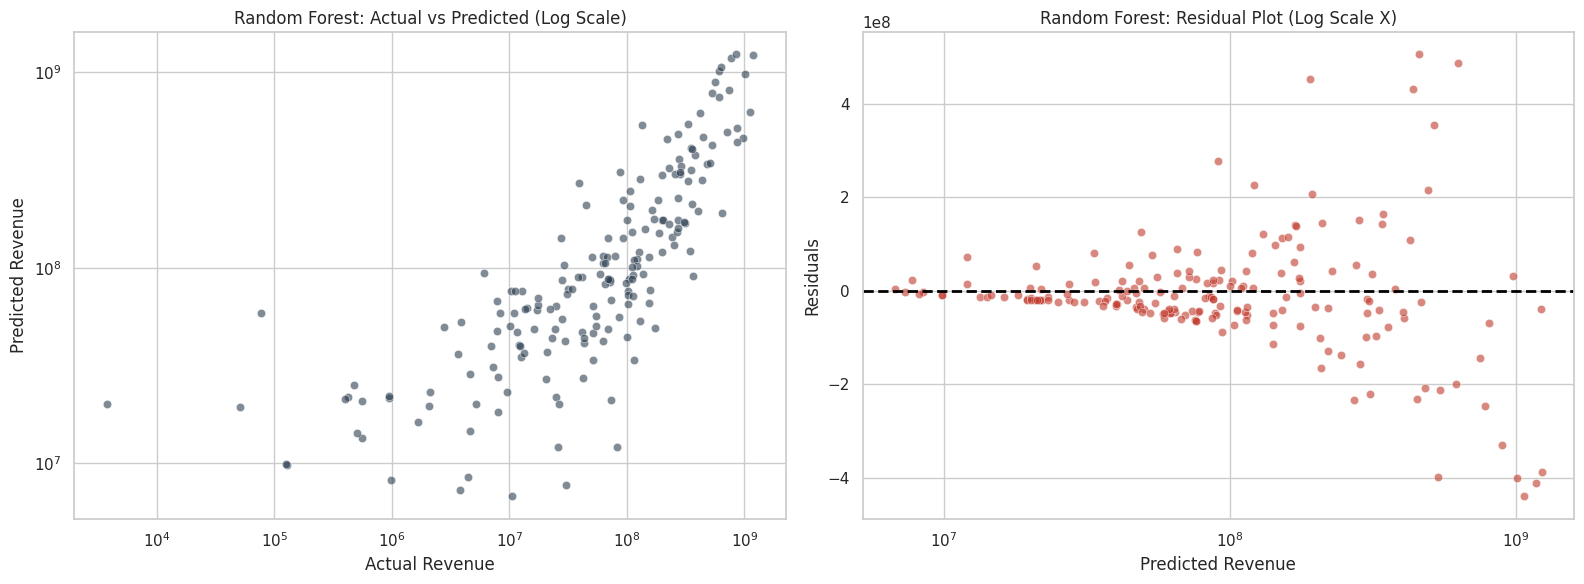

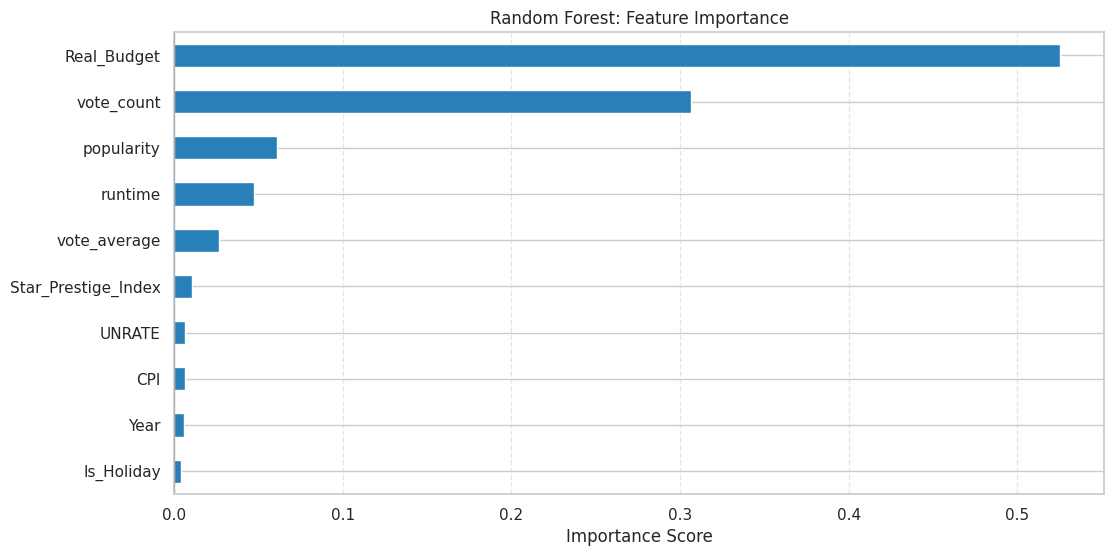



--------------------------------------------------




In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('processed_movie_data.csv')

target = 'Real_Revenue'
drop_cols = ['movie_id', 'Title', 'title_x', 'release_date', 'genres', 'cast', 'crew',
             'production_companies', 'Top_Cast', 'Director', 'Has_Prestige',
             'revenue', 'budget', 'Log_Real_Revenue', 'Log_Real_Budget', target]

cols_to_drop = [c for c in drop_cols if c in df.columns]
X = df.drop(columns=cols_to_drop).select_dtypes(include=[np.number])
y = df[target]

# Splitting Data: I will be using %80 for training, %20 for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Setup Complete. Features: {list(X.columns)}")
print("-" * 50)


# HELPER FUNCTIONS FOR VISUALIZATION

def plot_performance(model_name, y_test, y_pred):

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, ax=axes[0], color='#2c3e50')

    if model_name == "Random Forest":
        axes[0].set_xscale('log')
        axes[0].set_yscale('log')
        axes[0].set_title(f'{model_name}: Actual vs Predicted (Log Scale)')
    else:
        min_val, max_val = min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())
        axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
        axes[0].set_title(f'{model_name}: Actual vs Predicted')
        axes[0].legend()

    axes[0].set_xlabel('Actual Revenue')
    axes[0].set_ylabel('Predicted Revenue')

    residuals = y_test - y_pred
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, ax=axes[1], color='#c0392b')
    axes[1].axhline(y=0, color='black', linestyle='--', lw=2)

    if model_name == "Random Forest":
        axes[1].set_xscale('log')
        axes[1].set_title(f'{model_name}: Residual Plot (Log Scale X)')
    else:
        axes[1].set_title(f'{model_name}: Residual Plot (Errors)')

    axes[1].set_xlabel('Predicted Revenue')
    axes[1].set_ylabel('Residuals')

    plt.tight_layout()
    plt.show()

def plot_importance(model_name, model, feature_names):
    plt.figure(figsize=(12, 6))

    if hasattr(model, 'coef_'):
        data = pd.Series(model.coef_, index=feature_names)
        title = f'{model_name}: Feature Coefficients (Weights)'
        colors = ['#27ae60' if c > 0 else '#c0392b' for c in data.values]
        xlabel = 'Coefficient Value (Standardized)'

    elif hasattr(model, 'feature_importances_'):
        data = pd.Series(model.feature_importances_, index=feature_names)
        title = f'{model_name}: Feature Importance'
        colors = '#2980b9'
        xlabel = 'Importance Score'

    data.sort_values().plot(kind='barh', color=colors)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.axvline(x=0, color='black', linewidth=0.8)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()



# TRAINING LOOP & RESULT AGGREGATION

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = []
trained_models = {}
predictions = {}

print("\n>>> MODEL TRAINING & EVALUATION STARTED <<<\n")

for name, model in models.items():
    # Training
    model.fit(X_train_scaled, y_train)

    # Predicting
    y_pred = model.predict(X_test_scaled)

    # Storing
    trained_models[name] = model
    predictions[name] = y_pred

    # Evaluating
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({"Model": name, "R2 Score": r2, "RMSE": rmse})

    print(f"Finished: {name} (R2: {r2:.4f})")

print("\n" + "="*50 + "\n")



# VISUALIZATION EXECUTION

# A. Overall Comparison
print("### 1. OVERALL MODEL COMPARISON ###")
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
sns.barplot(x="R2 Score", y="Model", hue="Model", data=results_df, palette="viridis", legend=False)
plt.title("Model Performance Comparison (R2 Score)")
plt.xlim(0, 1)
plt.show()

print("\n\n")

# B. Detailed Analysis per Model
for name in models.keys():
    print(f"### DETAILED ANALYSIS: {name.upper()} ###")

    # 1. Performance Plots (Actual vs Pred & Residuals)
    plot_performance(name, y_test, predictions[name])
    print("\n")

    # 2. Importance/Coefficients Plot
    plot_importance(name, trained_models[name], X.columns)

    print("\n\n" + "-"*50 + "\n\n")

**Linear models simply add up the features, so they fail to see that a high budget and famous stars together create a huge impact. Random Forest, however, detects these complex patterns and groups similar successful movies together, leading to a much higher prediction.**



In [13]:
# DISPLAY EQUATION AND MAKE NEW PREDICTIONS


# PRINT LINEAR REGRESSION EQUATION
print(">>> LINEAR REGRESSION EQUATION (MATHEMATICAL MODEL) <<<")
lr_model = trained_models['Linear Regression']
intercept = lr_model.intercept_ # Constant/Bias (b)
coeffs = lr_model.coef_         # Weights (w)
feature_names = X.columns

equation = f"Real_Revenue = {intercept:,.2f} "
for i, col_name in enumerate(feature_names):
    weight = coeffs[i]
    sign = "+" if weight >= 0 else "" # Add + if positive, negative numbers already have -
    equation += f"{sign} ({weight:,.2f} * {col_name}) "

print(equation)
print("\nNote: The coefficients in this equation are based on 'Standardized' data.\n")


# PREDICTION FUNCTION FOR NEW DATA

def predict_movie_revenue(budget, vote_avg, popularity, unrate, cpi, star_prestige, is_holiday):


    input_data = pd.DataFrame(columns=feature_names)
    input_data.loc[0] = 0

    if 'Real_Budget' in input_data.columns: input_data['Real_Budget'] = budget
    if 'vote_average' in input_data.columns: input_data['vote_average'] = vote_avg
    if 'popularity' in input_data.columns: input_data['popularity'] = popularity
    if 'UNRATE' in input_data.columns: input_data['UNRATE'] = unrate
    if 'CPI' in input_data.columns: input_data['CPI'] = cpi
    if 'Star_Prestige_Index' in input_data.columns: input_data['Star_Prestige_Index'] = star_prestige
    if 'Is_Holiday' in input_data.columns: input_data['Is_Holiday'] = is_holiday
    if 'Year' in input_data.columns: input_data['Year'] = 2024

    # Standardizing the Data
    input_scaled = scaler.transform(input_data)

    # Making Prediction
    print(f"\n--- NEW MOVIE SCENARIO ---")
    print(f"Budget: ${budget:,.0f}, Score: {vote_avg}, Prestige: {star_prestige}, Holiday: {is_holiday}")
    print("-" * 30)

    for name, model in trained_models.items():
        prediction = model.predict(input_scaled)[0]
        print(f"{name} Prediction: ${prediction:,.2f}")

# --- EXAMPLE SCENARIO ---
# Budget: $100 Million, IMDB: 7.5, Popularity: 50, Unemployment: 4.0, CPI: 310, Prestige: 10 (Oscar winners), Holiday: 1 (Yes)
predict_movie_revenue(
    budget=100000000,
    vote_avg=7.5,
    popularity=50,
    unrate=4.0,
    cpi=310,
    star_prestige=10,
    is_holiday=1
)

>>> LINEAR REGRESSION EQUATION (MATHEMATICAL MODEL) <<<
Real_Revenue = 185,733,832.97 + (24,884,251.06 * popularity)  (-15,271,395.13 * runtime) + (7,139,343.38 * vote_average) + (104,508,575.87 * vote_count) + (8,637,680.26 * Year)  (-3,995,714.33 * Star_Prestige_Index)  (-18,664,415.51 * CPI) + (140,505,993.41 * Real_Budget)  (-4,440,765.07 * UNRATE)  (-577,322.68 * Is_Holiday) 

Note: The coefficients in this equation are based on 'Standardized' data.


--- NEW MOVIE SCENARIO ---
Budget: $100,000,000, Score: 7.5, Prestige: 10, Holiday: 1
------------------------------
Linear Regression Prediction: $114,650,790.68
Ridge Regression Prediction: $115,150,374.36
Random Forest Prediction: $301,824,962.38


In [14]:
# In the training set, the average box office revenue of films with budgets between 80M and 120M.
similars = df[(df['Real_Budget'] > 80000000) & (df['Real_Budget'] < 120000000)]
print(f"The average value of the box office revenue of the films with similar budget: ${similars['Real_Revenue'].mean():,.2f}")
print(f"The median value of the box office revenue of the films with similar budget: ${similars['Real_Revenue'].median():,.2f}")

The average value of the box office revenue of the films with similar budget: $311,945,722.37
The median value of the box office revenue of the films with similar budget: $244,589,850.41
